Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [102]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin_Cancer_Samples\\Train")
data_dir_test = pathlib.Path('Skin_Cancer_Samples\\Test')

In [9]:
data_dir_test

WindowsPath('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [10]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [11]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [35]:
## Train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir_train,
        labels="inferred",label_mode="categorical",
        batch_size=batch_size, color_mode="rgb",validation_split=0.2, image_size=(img_height,img_width), seed=123,subset="training"
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [36]:
## Validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir_train,
        labels="inferred",label_mode="categorical",
        batch_size=batch_size, color_mode="rgb",validation_split=0.2, image_size=(img_height,img_width), seed=123,subset="validation"
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [37]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [38]:
print(train_ds)
print(val_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>


### Visualize the data

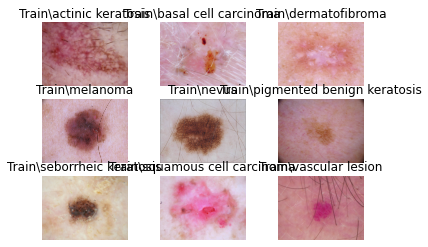

In [34]:
import matplotlib.pyplot as plt

cnt=0
for folderPath, folderName, filenames in os.walk(str("Skin_Cancer_Samples//Train")):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(folderPath)+"/"+str(filename))
        plt.subplot(3,3,cnt+1)
        plt.title(str(folderPath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        cnt=cnt+1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [39]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [41]:
#Importing required libraries
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [54]:
# Building the model
model = Sequential()

#Rescaling (0,1)
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, offset=0.0))

#first layer
model.add(Conv2D(32, kernel_size=(3,3), padding="same", input_shape=(180, 180, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Second layer
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.4))

#Softmax layer
model.add(Dense(9, activation="softmax"))

### Compile the model

In [47]:
model.compile(
            optimizer= "adam",
            loss="categorical_crossentropy",
            metrics=['accuracy']
)

### Train the model

In [50]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 101s 2s/step - loss: 2.0756 - accuracy: 0.1975 - val_loss: 2.1092 - val_accuracy: 0.2953
Epoch 2/20
56/56 [==============================] - 94s 2s/step - loss: 1.9671 - accuracy: 0.2718 - val_loss: 1.9354 - val_accuracy: 0.2416
Epoch 3/20
56/56 [==============================] - 95s 2s/step - loss: 1.8108 - accuracy: 0.3638 - val_loss: 1.7732 - val_accuracy: 0.4385
Epoch 4/20
56/56 [==============================] - 114s 2s/step - loss: 1.6159 - accuracy: 0.4252 - val_loss: 1.5487 - val_accuracy: 0.5101
Epoch 5/20
56/56 [==============================] - 110s 2s/step - loss: 1.5561 - accuracy: 0.4732 - val_loss: 1.5141 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 108s 2s/step - loss: 1.4934 - accuracy: 0.4866 - val_loss: 1.4725 - val_accuracy: 0.5369
Epoch 7/20
56/56 [==============================] - 114s 2s/step - loss: 1.4437 - accuracy: 0.5095 - val_loss: 1.4038 - val_accuracy: 0.5481
Epoch 8/20
56/5

### Model Summary

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

### Visualizing training results

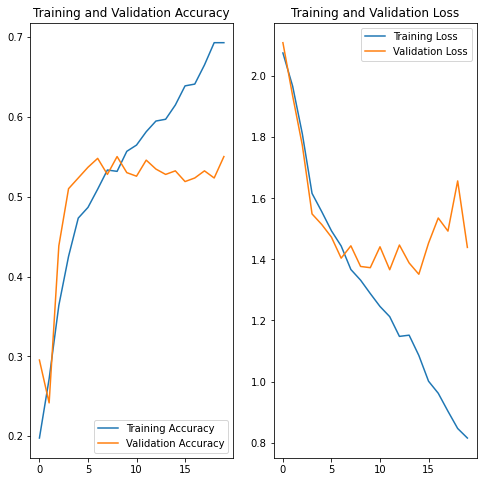

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings

- Training accuracy is 69 % whereas Validation accuracy is 55 %
- Looking at the value, we can see the above model is overfitted.
- Lets try to add more Dropouts as a part of regularization if didnt work, L1 we can go for trying out.
- Also lets add more layers too

### Todo:
### Create the model, compile and train the model


In [58]:
# Building the model with the increased regularisation or dropout values to improve the accuracy.
model2 = Sequential()

model2.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, offset=0.0))

model2.add(Conv2D(32, kernel_size=(3,3), padding="same", input_shape=(180, 180, 3), activation="relu"))
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.7))

model2.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.7))


model2.add(Conv2D(128, kernel_size=(3,3), activation="relu", padding="same"))
model2.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.7))

# flatten and put a fully connected layer
model2.add(Flatten())
model2.add(Dense(100, activation='relu')) # fully connected
model2.add(Dropout(0.25))

#Softmax layer
model2.add(Dense(9, activation="softmax"))

### Compiling the model

In [59]:
model2.compile(
            optimizer= "adam",
            loss="categorical_crossentropy",
            metrics=['accuracy']
)

### Training the model

In [61]:
epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 492s 8s/step - loss: 2.0878 - accuracy: 0.1892 - val_loss: 2.0541 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 391s 7s/step - loss: 2.0369 - accuracy: 0.1992 - val_loss: 2.0200 - val_accuracy: 0.2103
Epoch 3/20
56/56 [==============================] - 488s 9s/step - loss: 2.0282 - accuracy: 0.1936 - val_loss: 2.0081 - val_accuracy: 0.2573
Epoch 4/20
56/56 [==============================] - 588s 11s/step - loss: 1.9783 - accuracy: 0.2266 - val_loss: 1.9536 - val_accuracy: 0.2416
Epoch 5/20
56/56 [==============================] - 619s 11s/step - loss: 1.9317 - accuracy: 0.2483 - val_loss: 1.9075 - val_accuracy: 0.3132
Epoch 6/20
56/56 [==============================] - 590s 11s/step - loss: 1.9051 - accuracy: 0.2896 - val_loss: 1.7988 - val_accuracy: 0.3624
Epoch 7/20
56/56 [==============================] - 570s 10s/step - loss: 1.8389 - accuracy: 0.3114 - val_loss: 1.7670 - val_accuracy: 0.3378
Epoch 8/2

### Visualizing the results

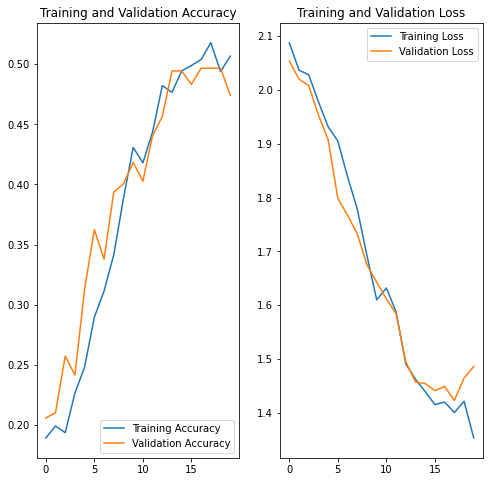

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()### Visualizing the results

### Findings

- We can the on Model2, Training accuracy is 50 % and Validation accuracy is 47 %
- Clearly we overcome from the overfitting issue which was there in the model 1 (model).
- Seems increasing dropout does helps with the solving the Overfit issue.
- After trying out several values of Dropout, we could see higher value of Droupout leading to low accuracy (previously parameter), probably the loss of information. So after trying some value, found 0.25 optimal.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [118]:
for i in class_names:
    folder = "Skin_Cancer_Samples\\Train\\" + i + "\\"
    img_folder = pathlib.Path(folder)
    no_of_images = len(list(img_folder.glob("*.jpg")))
    print(no_of_images, "> > > >", i)

114 > > > > actinic keratosis
376 > > > > basal cell carcinoma
95 > > > > dermatofibroma
438 > > > > melanoma
357 > > > > nevus
462 > > > > pigmented benign keratosis
77 > > > > seborrheic keratosis
181 > > > > squamous cell carcinoma
139 > > > > vascular lesion


### Findings


- Class `Seborrheic Keratosis (77)` has the least number of samples, followed by `Dermatofibroma (95)` 
- Class `Pigmented Benign Keratosis (462)` is leading in terms of number of samples, followed by `Melanoma (438)` has the second highest number of samples
- Clearly there is a Class Imbalance as number of samples are not identical in all the categories or class.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [99]:
!pip install Augmentor

In [95]:
import Augmentor
print(Augmentor.__version__)

0.2.10


In [100]:
path_to_training_dataset="Skin_Cancer_Samples\\Train\\"

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin_Cancer_Samples\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x183E839DBE0>: 100%|█| 500/500 [00:30<00:00, 16.62 Samples/


Initialised with 376 image(s) found.
Output directory set to Skin_Cancer_Samples\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x183E835B5E0>: 100%|█| 500/500 [00:32<00:00, 15.51 Samples/


Initialised with 95 image(s) found.
Output directory set to Skin_Cancer_Samples\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x183E36A8790>: 100%|█| 500/500 [00:32<00:00, 15.53 Samples/


Initialised with 438 image(s) found.
Output directory set to Skin_Cancer_Samples\Train\melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x183E2A3F730>: 100%|█| 500/500 [02:03<0


Initialised with 357 image(s) found.
Output directory set to Skin_Cancer_Samples\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x183E5B546D0>: 100%|█| 500/500 [01:48<00:00,  4.59 Samples/


Initialised with 462 image(s) found.
Output directory set to Skin_Cancer_Samples\Train\pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x183E8FC0880>: 100%|█| 500/500 [00:26<00:


Initialised with 77 image(s) found.
Output directory set to Skin_Cancer_Samples\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x183E817CA60>: 100%|█| 500/500 [00:56<00:00,  8.78 Samples


Initialised with 181 image(s) found.
Output directory set to Skin_Cancer_Samples\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x183B140A8E0>: 100%|█| 500/500 [00:24<00:00, 20.79 Samples/


Initialised with 139 image(s) found.
Output directory set to Skin_Cancer_Samples\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x183E870E280>: 100%|█| 500/500 [00:24<00:00, 20.77 Samples/


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [103]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [108]:
from glob import glob

In [109]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Skin_Cancer_Samples\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_3174fbf4-7f78-4b1e-b8cc-a7ab38e265fe.jpg',
 'Skin_Cancer_Samples\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_3d1dd6c1-738e-4317-b46d-20029c331710.jpg',
 'Skin_Cancer_Samples\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_3eb4036e-98dd-4a94-a1d0-afbc6430ed25.jpg',
 'Skin_Cancer_Samples\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_49352616-8898-4179-af4a-c6128a1465f5.jpg',
 'Skin_Cancer_Samples\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_fc3ba910-39e9-4402-bbca-6df700b0efa7.jpg',
 'Skin_Cancer_Samples\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_06341b38-ce4c-4c78-9dbe-fa7001d3a714.jpg',
 'Skin_Cancer_Samples\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_77598e55-714e-422b-ad4a-7517dc80fb1

In [110]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [112]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [114]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [116]:
df2.shape

(4500, 2)

In [117]:
df2['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [120]:
batch_size_updated = 32
img_height_updated = 180
img_width_updated = 180

#### Training dataset

In [137]:
data_dir_train = "Skin_Cancer_Samples\\Train\\"
train_ds_2 = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  label_mode="categorical",
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height_updated, img_width_updated),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Validation Dataset

In [136]:
val_ds_2 = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  label_mode="categorical",
  seed=123,
  validation_split = 0.2,
  subset ="validation",
  image_size=(img_height_updated, img_width_updated),
  batch_size=batch_size_updated)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Model 3

In [140]:
model3 = Sequential()

model3.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, offset=0.0))

model3.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(180, 180, 3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(180, 180, 3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape=(180, 180, 3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape=(180, 180, 3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(128, activation='relu')) # fully connected
model3.add(Dropout(0.5))

#Softmax layer
model3.add(Dense(9, activation="softmax"))

## After adding normalization, Dropouts to try out these model but unable to run the same machine is getting crashed and 
#unable to analyse the result so trying out the simple model with 2 layer and some less dropout

In [144]:
model3=Sequential()
    
model3.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,))         
    
model3.add(Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.1))#### **Todo**: Train the model on the data created using Augmentor
    
model3.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.1))
    
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(9, activation='softmax'))

# Revised and simple building model for starting and check the performance

#### Compile the model3

In [145]:
model3.compile(
            optimizer= "adam",
            loss="categorical_crossentropy",
            metrics=['accuracy']
)

#### Train the model

In [146]:
epochs2 = 30
history = model3.fit(
  train_ds_2,
  validation_data=val_ds_2,
  epochs=epochs2
)

Epoch 1/30
169/169 [==============================] - 903s 5s/step - loss: 2.5053 - accuracy: 0.1830 - val_loss: 2.0053 - val_accuracy: 0.2242
Epoch 2/30
169/169 [==============================] - 652s 4s/step - loss: 1.7883 - accuracy: 0.3175 - val_loss: 1.5541 - val_accuracy: 0.4165
Epoch 3/30
169/169 [==============================] - 667s 4s/step - loss: 1.4891 - accuracy: 0.4382 - val_loss: 1.5598 - val_accuracy: 0.4284
Epoch 4/30
169/169 [==============================] - 690s 4s/step - loss: 1.3782 - accuracy: 0.4803 - val_loss: 1.2925 - val_accuracy: 0.5122
Epoch 5/30
169/169 [==============================] - 636s 4s/step - loss: 1.2233 - accuracy: 0.5458 - val_loss: 1.2594 - val_accuracy: 0.5338
Epoch 6/30
169/169 [==============================] - 844s 5s/step - loss: 1.1269 - accuracy: 0.5836 - val_loss: 1.0974 - val_accuracy: 0.5895
Epoch 7/30
169/169 [==============================] - 728s 4s/step - loss: 0.9806 - accuracy: 0.6430 - val_loss: 1.0731 - val_accuracy: 0.6132

#### Visualize the accuracy of Training and Validation

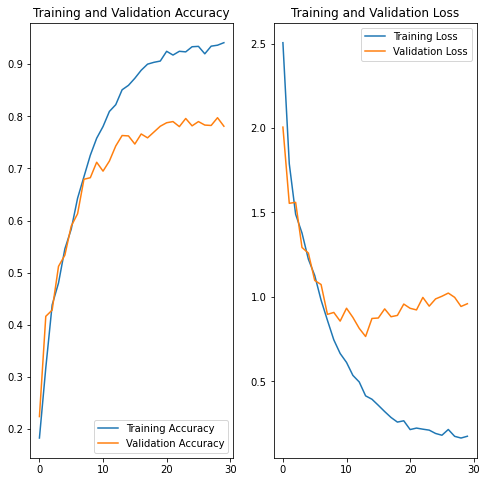

In [147]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs2)

plt.figure(figsize=(8, #### **Todo**: Train the model on the data created using Augmentor8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings


- We can see after handling the class imbalance and building the model on top of that the accuracy went high
- the Training accuracy is crossing 90% and the Validation is approx. 80%
- We can try increasing the dropout values to reduce the gap between training and validation accuracy.
- Lets try to build the same.

## Model 4

In [149]:
# Building the model for improving the accuracy
model4=Sequential()
    
model4.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,))         
    
model4.add(Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.2))
    
model4.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.2))
    
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(9, activation='softmax'))

In [152]:
model4.compile(
            optimizer= "adam",
            loss="categorical_crossentropy",
            metrics=['accuracy']
)

In [ ]:
history2 = model4.fit(
  train_ds_2,
  validation_data=val_ds_2,
  epochs=epochs2
)


Epoch 1/30
169/169 [==============================] - 698s 4s/step - loss: 1.6081 - accuracy: 0.3941 - val_loss: 1.5137 - val_accuracy: 0.4536
Epoch 2/30
169/169 [==============================] - 591s 3s/step - loss: 1.4265 - accuracy: 0.4616 - val_loss: 1.3585 - val_accuracy: 0.5085
Epoch 3/30
169/169 [==============================] - 595s 3s/step - loss: 1.3222 - accuracy: 0.4987 - val_loss: 1.2855 - val_accuracy: 0.5479
Epoch 4/30
169/169 [==============================] - 581s 3s/step - loss: 1.2057 - accuracy: 0.5490 - val_loss: 1.1992 - val_accuracy: 0.5746
Epoch 5/30
169/169 [==============================] - 615s 4s/step - loss: 1.1153 - accuracy: 0.5760 - val_loss: 1.1188 - val_accuracy: 0.5739
Epoch 6/30
169/169 [==============================] - 967s 6s/step - loss: 1.0050 - accuracy: 0.6293 - val_loss: 1.1791 - val_accuracy: 0.5791
Epoch 7/30
169/169 [==============================] - 678s 4s/step - loss: 0.9179 - accuracy: 0.6597 - val_loss: 0.9400 - val_accuracy: 0.6570

### Findings

- We can see by increasing the values of dropout the accuracy is getting improved, but to sudden stop of machine and insufficient time model training stopped abruptly.
- But we can see after improving dropouts the gap between training and validation accuracy reduced
- Training accuracy will be approx 90% and the validation accuracy will be approx 82%.